In [ ]:
#Prophet model for time series forecast
from prophet import Prophet



#Data processing
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#Model performance evaluation
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score


In [ ]:

bcm = pd.read_csv(r"C:\Users\Parsazh\Documents\GitHub\Machine-Learning\data\BCM_DATA.csv",index_col=[0],parse_dates=[0])


In [ ]:
train_end_date = pd.to_datetime('2024-03-01')

bcm_train = bcm.loc[bcm.index <= train_end_date].copy()
bcm_test = bcm.loc[bcm.index > train_end_date].copy()

print(bcm_train.tail())

# Format data for prophet model using ds and y
bcm_train_prophet = bcm_train["TOT_PAID"].reset_index().rename(columns={'ACC_MONTH':'ds','TOT_PAID':'y'})
bcm_test_prophet = bcm_test["TOT_PAID"].reset_index().rename(columns={'ACC_MONTH':'ds','TOT_PAID':'y'})
#print(bcm_train_prophet.head())


In [7]:

#model fit:
model = Prophet()
model.fit(bcm_train_prophet)

# Predict on test set with model

bcm_test_fcst = model.predict(bcm_test_prophet)
bcm_train_fcst= model.predict(bcm_train_prophet) # fit the model on training dataset
print(bcm_test_fcst.head())
print(bcm_train_fcst.head())

19:54:35 - cmdstanpy - INFO - Chain [1] start processing
19:54:36 - cmdstanpy - INFO - Chain [1] done processing


          ds         trend    yhat_lower    yhat_upper   trend_lower  \
0 2024-04-01  2.001053e+06  1.737213e+06  2.711012e+06  2.001053e+06   
1 2024-05-01  2.001451e+06  1.600937e+06  2.557936e+06  2.001451e+06   
2 2024-06-01  2.001863e+06  1.483137e+06  2.471903e+06  2.001863e+06   
3 2024-07-01  2.002261e+06  1.733654e+06  2.702314e+06  2.002261e+06   
4 2024-08-01  2.002672e+06  1.372508e+06  2.320153e+06  2.002672e+06   

    trend_upper  additive_terms  additive_terms_lower  additive_terms_upper  \
0  2.001053e+06   224625.505407         224625.505407         224625.505407   
1  2.001451e+06    77238.516836          77238.516836          77238.516836   
2  2.001863e+06   -16914.872728         -16914.872728         -16914.872728   
3  2.002261e+06   226815.183717         226815.183717         226815.183717   
4  2.002672e+06  -163620.074181        -163620.074181        -163620.074181   

          yearly   yearly_lower   yearly_upper  multiplicative_terms  \
0  224625.505407  22

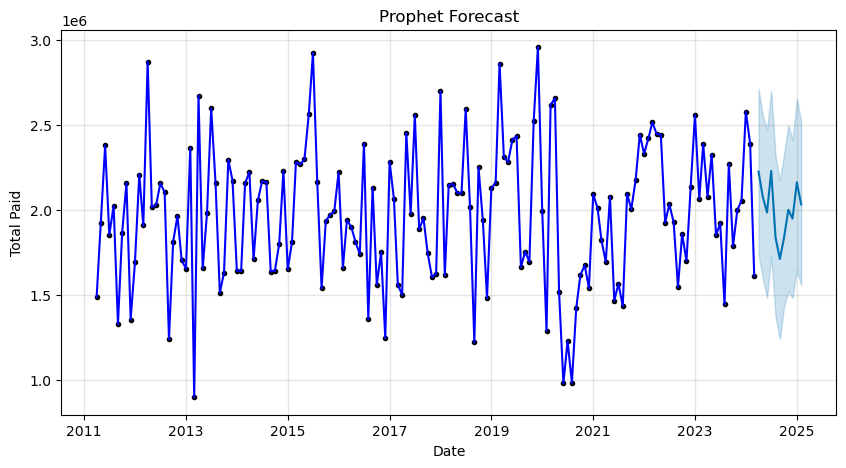

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))
fig = model.plot(bcm_test_fcst, ax=ax, xlabel='Date', ylabel='Total Paid')
ax.plot(bcm_train.index, bcm_train['TOT_PAID'], color='b')

ax.set_title('Prophet Forecast')


#fig = model.plot_components(bcm_test_fcst)

plt.show()




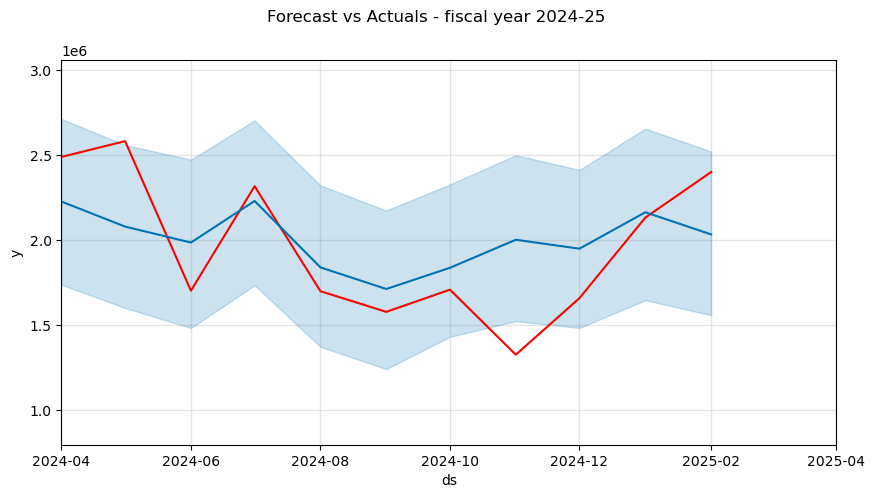

In [9]:

#plot one fiscal year

lower_bound = pd.to_datetime('2024-04-01')  # Ensure correct format
upper_bound = pd.to_datetime('2025-04-01')

fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(bcm_test.index, bcm_test['TOT_PAID'], color='r')
fig = model.plot(bcm_test_fcst, ax=ax)
# Set x-axis limits with datetime values
ax.set_xbound(lower=lower_bound, upper=upper_bound)
#ax.set_ylim(0, 60000)
plot = plt.suptitle('Forecast vs Actuals - fiscal year 2024-25')
#plt.show()
